In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# Confusion Matrix

In [2]:
#https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('cool') ##https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [3]:
dataset = pd.read_csv('dataset.csv')

In [24]:
dataset.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trestbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalach'}>],
       [<AxesSubplot:title={'center':'exang'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'ca'}>],
       [<AxesSubplot:title={'center':'thal'}>,
        <AxesSubplot:title={'center':'target'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

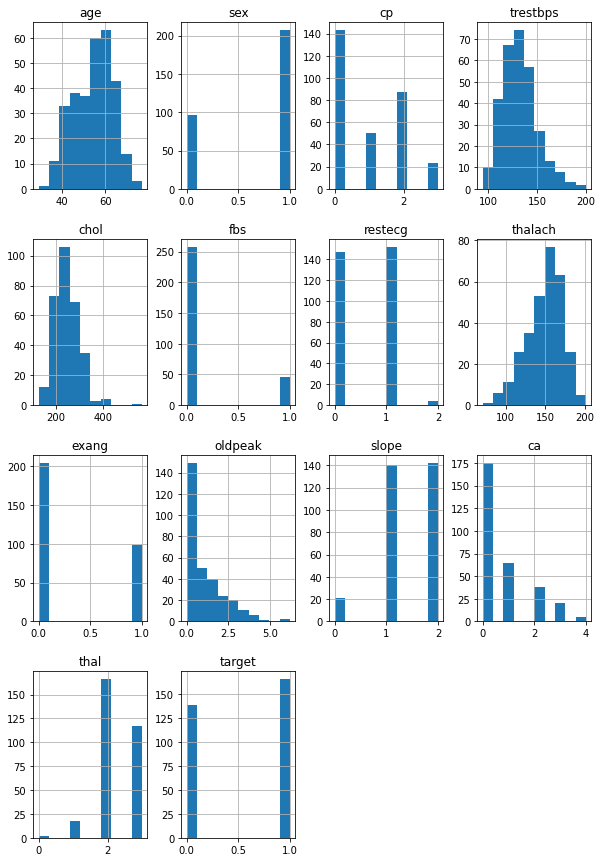

In [6]:
rcParams['figure.figsize'] = 10,15
dataset.hist()

In [7]:
dataset['target'].unique()

array([1, 0], dtype=int64)

Text(0, 0.5, 'Count')

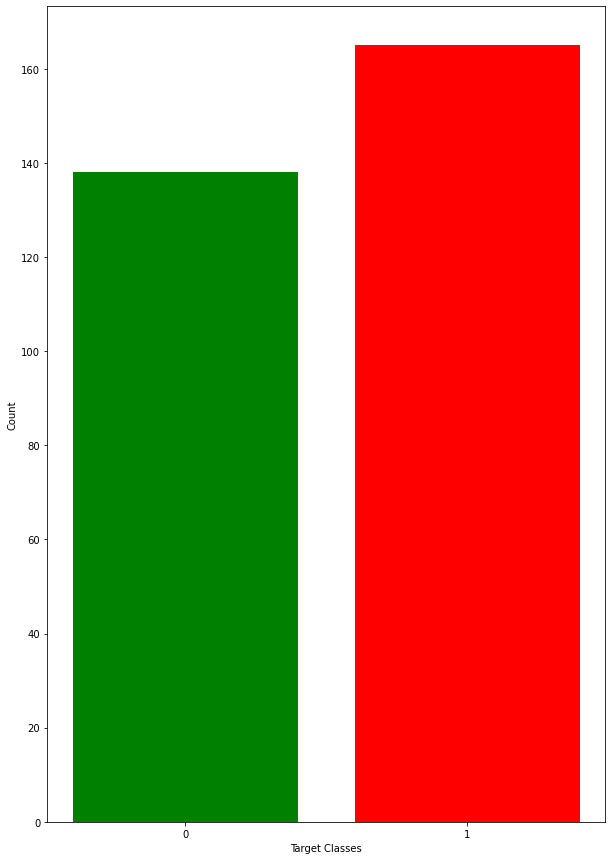

In [9]:
plt.bar(dataset['target'].unique(), dataset['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
#plt.title('Count of each Target Class')

# Data Preprocessing

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#This is the preprocessing
dataset_Dum = pd.get_dummies(dataset, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'],drop_first=True)
dataset_Dum.head(2)

,age,trestbps,chol,thalach,oldpeak,target,sex_1,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# Machine Learning
I'll now import train_test_split to split our dataset into training and testing datasets. Then, I'll import all Machine Learning models I'll be using to train and test the data.

In [26]:
y = dataset_Dum['target']
X = dataset_Dum.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10, random_state = 0)

# Standardizing the Data

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) #calculate the paramters for scaling

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Identify the Grid search and Train the model

In [34]:
from sklearn.neural_network import MLPClassifier
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
Hyper_paramters={'batch_size':["auto",100],'hidden_layer_sizes':[(5,5,5), (5), (6), (4)],
                 'learning_rate_init':[0.001,0.005, 0.01],'max_iter':[500,600]}

NN_Gridsearch_paramters=GridSearchCV(MLPClassifier(),Hyper_paramters,scoring='roc_auc',n_jobs=-1,
                                     cv=5,return_train_score=False,verbose=0)
#NN_Gridsearch_paramters=GridSearchCV(MLPClassifier(early_stopping=True),Hyper_paramters,scoring='roc_auc',n_jobs=-1,cv=5,verbose=0)

NN_crossvalidation=NN_Gridsearch_paramters.fit(X_train,y_train)

#Tree_crossvalidation=Tree_Gridsearch_paramters.fit(X_train,Ytrain.values.ravel())

print ("The best paramter combination is ")

print(NN_crossvalidation.best_params_)  #gets best estimator

Final_Model=NN_crossvalidation.best_estimator_ #gets best estimator

print("The best AUC score was ")

print(NN_crossvalidation.best_score_)  #gets best score for best estimator # -0.83828599184062269


The best paramter combination is 
{'batch_size': 'auto', 'hidden_layer_sizes': 4, 'learning_rate_init': 0.001, 'max_iter': 500}
The best AUC score was 
0.9134826164874553


C:\Users\saleh\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
#Hhere we are printing the results of the cross-validation (unuesed models)
Summary=NN_crossvalidation.cv_results_
df = pd.DataFrame(data=Summary)
df.head()
df.to_excel('CV_Results.xlsx')

In [35]:
#Prediction Using the Model
y_pred = Final_Model.predict(X_test)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)
print(classification_report(y_test, y_pred, target_names=["Heart disease", "No Heart Disears"]))

#Calculate sensitivity and specificity

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

[[15  2]
 [ 2 12]]
                  precision    recall  f1-score   support

   Heart disease       0.88      0.88      0.88        17
No Heart Disears       0.86      0.86      0.86        14

        accuracy                           0.87        31
       macro avg       0.87      0.87      0.87        31
    weighted avg       0.87      0.87      0.87        31

Accuracy :  0.8709677419354839
Sensitivity :  0.8823529411764706
Specificity :  0.8571428571428571


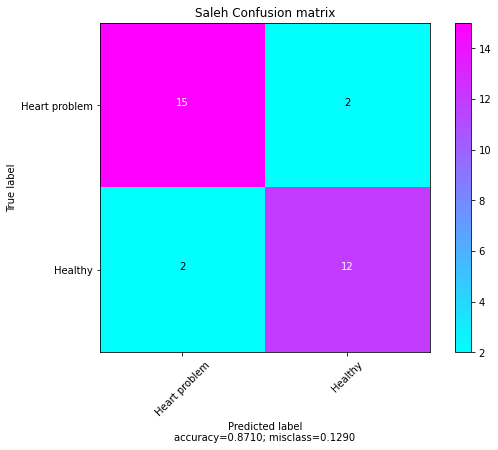

In [36]:
plot_confusion_matrix(cm1,
                          ["Heart problem","Healthy"], # use y_train.unique()  to know order of labels
                          title='Saleh Confusion matrix',
                          cmap=None,
                          normalize=False)